# Binance API Test   
This notebook will be used to learn and test features of Binance API.

In [75]:
import requests
import json
import time
import asyncio
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from flask import Flask
from datetime import datetime
from binance.client import Client

### Creating a BinanceAPI cliente

In [76]:
api_key = "zVt6HyoDNTzvcuWLtCbznlMLasqOlaKblse87WnohfJ2BIFM6G6N4AmzJ5zznS3T"
api_secret = "NE3odMQHEVxBvOj8Wsiul33gp0lXTV7DKsF8eXTGLW0yHBK2Yl5xt8h4OQ7sPkgm"

client = Client( api_key, api_secret, testnet = True )

In [77]:
# get the status of the server
status = client.get_system_status()
print( status )


{'status': 0, 'msg': 'normal'}


In [78]:
# list of OHLCV values (Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, Number of trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore)

symbol = "BTCUSDT"
interval = Client.KLINE_INTERVAL_30MINUTE
limit = 850
startTime = "1 Dec, 2020"
endTime = "1 Dec, 2020"

klines = client.get_historical_klines( "ETHUSDT", Client.KLINE_INTERVAL_30MINUTE )

if len( klines ) > 0:
    print( f"{len( klines )} candles found!" )
    print( f"Open for first candle {datetime.fromtimestamp( klines[ 0 ][ 0]/1000 )}" )
    print( f"Open for first candle {datetime.fromtimestamp( klines[ 0 ][ 6]/1000 )}" )

    print( f"Open for last candle {datetime.fromtimestamp( klines[ len( klines ) - 1 ][ 0]/1000 )}" )
    print( f"Open for last candle {datetime.fromtimestamp( klines[ len( klines ) - 1 ][ 6]/1000 )}" )
else:
    print( " No data ")




1000 candles found!
Open for first candle 2022-11-13 14:00:00
Open for first candle 2022-11-13 14:29:59.999000
Open for last candle 2022-12-04 09:30:00
Open for last candle 2022-12-04 09:59:59.999000


<AxesSubplot: >

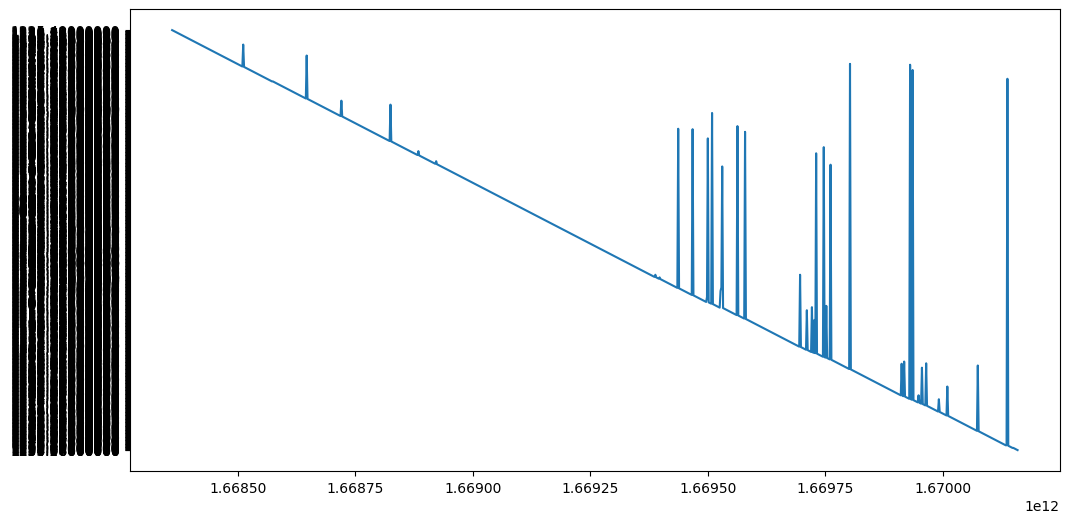

In [94]:
close_price = []
close_time = []
for candle in klines:
    close_price.append( candle[4] )
#     close_time.append( datetime.fromtimestamp( candle[6]/1000 ) )
    close_time.append( candle[6] )
    
df = pd.DataFrame( {"close_time":close_time, "close_price":close_price} )
# print( df[ "close_time" ] )


plt.figure( figsize = (12,6) )
sns.lineplot( x = close_time, y = close_price, data = df )

In [27]:
prices = client.get_all_tickers()
print( prices )

[{'symbol': 'BNBBUSD', 'price': '290.20000000'}, {'symbol': 'BTCBUSD', 'price': '16936.62000000'}, {'symbol': 'ETHBUSD', 'price': '1255.23000000'}, {'symbol': 'LTCBUSD', 'price': '76.07000000'}, {'symbol': 'TRXBUSD', 'price': '0.05315000'}, {'symbol': 'XRPBUSD', 'price': '0.38950000'}, {'symbol': 'BNBUSDT', 'price': '290.00000000'}, {'symbol': 'BTCUSDT', 'price': '16933.72000000'}, {'symbol': 'ETHUSDT', 'price': '1254.99000000'}, {'symbol': 'LTCUSDT', 'price': '76.07000000'}, {'symbol': 'TRXUSDT', 'price': '0.05314000'}, {'symbol': 'XRPUSDT', 'price': '0.38950000'}, {'symbol': 'BNBBTC', 'price': '0.01712900'}, {'symbol': 'ETHBTC', 'price': '0.07411900'}, {'symbol': 'LTCBTC', 'price': '0.00449100'}, {'symbol': 'TRXBTC', 'price': '0.00000314'}, {'symbol': 'XRPBTC', 'price': '0.00002301'}, {'symbol': 'LTCBNB', 'price': '0.26220000'}, {'symbol': 'TRXBNB', 'price': '0.00018320'}, {'symbol': 'XRPBNB', 'price': '0.00134300'}]


Open time = 2022-11-02 10:00:00
Close time = 2022-11-02 10:29:59.999000
